# IMDB Movies 10-year-gap Analysis - (2006-2016)
<p><b>Data: </b><a href="https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data">https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data</a></p>
<img src="./images/cinema_pic.jpg">
<p>Picture by <a href="https://unsplash.com/pt-br/@felixmooneeram?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Felix Mooneeram</a> on <a href="https://unsplash.com/pt-br/fotografias/red-cinema-chair-evlkOfkQ5rE?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  </p>

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import cycler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the data
df = pd.read_csv('./data/IMDB-Movie-Data.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


## Understanding the Dataset

<p>The dataset above shows the 1000 most popular movies on IMDB in a period of 10 years(2006-2016). The columns names are:
    <ul>
        <li>Rank: Movie rank order.</li>
        <li>Title: The title of the film.</li>
        <li>Genre: A comma-separated list of genres used to classify the film.</li>
        <li>Description: Brief one-sentence movie summary.</li>
        <li>Director: The name of the film's director.</li>
        <li>Actors: A comma-separated list of the main stars of the film.</li>
        <li>Year: The year that the film released as an integer.</li>
        <li>Runtime (Minutes): The duration of the film in minutes.</li>
        <li>Rating: User rating for the movie 0-10.</li>
        <li>Votes: Number of votes.</li>
        <li>Revenue (Millions): The revenue earned, in millions of dollars.</li>
        <li>Metascore: Weighted average value of reviews from top critics and publications for a given movie.</li>
    </ul>
</p>

<p>This dataset has both numerical(integers and floats) and categorical data, which can be interesting for us to have a vast observation on it.</p>

## Data Exploration and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
df.describe() 

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


<p>By looking the results of the describe() function, we can realize that some movies had a huge revenue, as it has extreme values. The max value of this column represents approximately 8 times more than the 3rd quartile value and, incredibly, almost 20 times more than the median. Also, the mean is 82.98, meanwhile the standard deviation is 103, a considerable gap as well. It means that our data is unbalanced to the left.

Another thing we should pay attention to, is that revenue has some missing values, and as this feature is very sensitive to just substitute by the mean or median, we will have to remove it, so that it doesnt mess with our analysis. </p>

In [5]:
df=df[~df['Revenue (Millions)'].isnull()].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                872 non-null    int64  
 1   Title               872 non-null    object 
 2   Genre               872 non-null    object 
 3   Description         872 non-null    object 
 4   Director            872 non-null    object 
 5   Actors              872 non-null    object 
 6   Year                872 non-null    int64  
 7   Runtime (Minutes)   872 non-null    int64  
 8   Rating              872 non-null    float64
 9   Votes               872 non-null    int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 88.6+ KB


<p>Since metascore has only a few null values and it doesnt seem to be unbalanced as revenue, we'll fill it with the mean.</p>

In [6]:
df['Metascore'].fillna(df['Metascore'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                872 non-null    int64  
 1   Title               872 non-null    object 
 2   Genre               872 non-null    object 
 3   Description         872 non-null    object 
 4   Director            872 non-null    object 
 5   Actors              872 non-null    object 
 6   Year                872 non-null    int64  
 7   Runtime (Minutes)   872 non-null    int64  
 8   Rating              872 non-null    float64
 9   Votes               872 non-null    int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           872 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 88.6+ KB


## 1. Analyzing the revenue by year

<Axes: xlabel='Year', ylabel='Revenue (Millions)'>

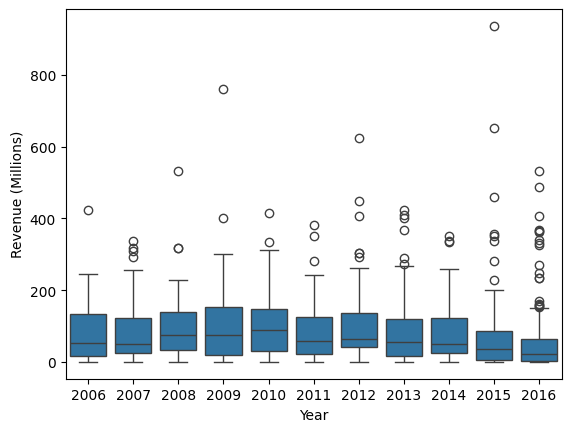

In [7]:
sns.boxplot(data=df, x='Year', y='Revenue (Millions)')

In [8]:
df[(df['Year']==2016)]['Revenue (Millions)'].mean() #mean revenue in 2016

54.690975609756094

<p>As we can see, 2009 and 2015 had the 3 most succesful movies between these 10 years gap. We'll see them below</p>

<p>On the other hand, 2016 was the worst year on the observed time gap, as revenues above 200 million dollars were already considered outliers. It means that the majority of the movies that year had a max revenue of 180 million, which is very low compared to the other years.</p>

In [9]:
df[(df['Year'] == 2009) & (df['Revenue (Millions)'] > 700) & (df['Revenue (Millions)'] < 800)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0


<p>Avatar, the most famous movie of 2009 with a revenue of 760 millions of dollars, a rating of 7.8 and a Metascore of 83.0</p>

In [10]:
df[(df['Year'] == 2015) & (df['Revenue (Millions)'] > 600)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0


<p>
    <ul>
        <li><b>Star Wars:</b> Episode VII - The Force Awakens: The year of 2015 provided us with the best movie of the decade gap, with a revenue of 936 million dollars, directed by J.J. Abrams. The rating is 8.1, the metascore is also 8.1. </li>
        <li><b>Jurassic World:</b> The classic Jurassic World, directed by Colin Trevorrow, was also an interesting movie in the year of 2015, with a revenue of more than 650 million dollars. </li>
    </ul>
    
</p>

## 2. Movies with the most revenue 

In [12]:
df.sort_values(by='Revenue (Millions)',ascending=False).head(20)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


<p>Analyzing the most famous genres and the movies with the most revenue, we can say that the best films are the ones with the following genres:
    <ul>
        <li>Action</li>
        <li>Sci-fi</li>
        <li>Drama</li>
        <li>Adventure</li>
        <li>Thriller</li>
    </ul>
</p>
<p>These are the most common genres among the top 20 best and most sucessful movies during the given gap.</p>

<p>Animation, Comedy and Fantasy are also included in many top films.</p>

## 3. Analyzing the Revenue

<Axes: xlabel='Revenue (Millions)', ylabel='Count'>

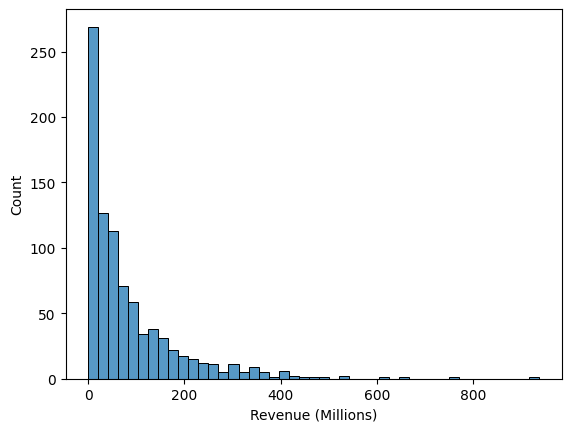

In [13]:
sns.histplot(data=df['Revenue (Millions)'])

<p>According to the histplot above, most movies cant have a revenue more than 200 million dollars. And, as already mentioned before, we can clearly see that our data is completely unbalanced to the left, which is normal because we are talking about making a lot of money, so of course a very tiny amount of them will have outrageous results.</p>

## 4. Analyzing if the higher the rating, the higher the revenue

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

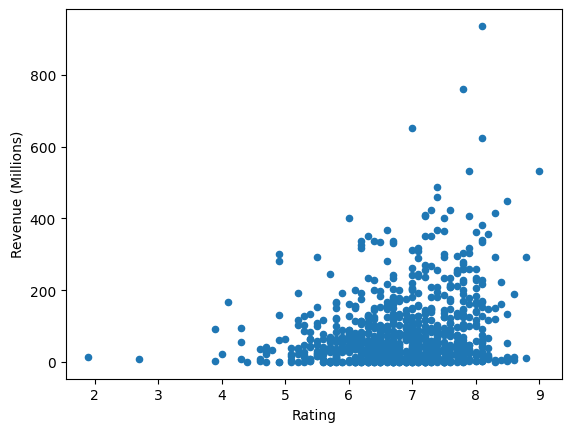

In [14]:
df.plot(kind='scatter',y='Revenue (Millions)', x='Rating')

<p>By looking at this scatter plot, we can see that it doesnt necessarily mean that, the highest the rating, the highest the revenue. But, only one movie with a revenue higher than 400 million doesnt have a rating score of 7 or above(which is pretty good). So yes, most of the time, a movie with a very high revenue will imply a high rating as well. That's a trend, not really a rule, though.  </p>

In [15]:
df[df['Rating'] < 3]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
829,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.17,15.0
871,872,Dragonball Evolution,"Action,Adventure,Fantasy",The young warrior Son Goku sets out on a quest...,James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2009,85,2.7,59512,9.35,45.0


<p>These are the movies with the worst ratings, completely far from the majority.</p> 

## 5. Most Famous Genres

<Axes: xlabel='count', ylabel='Genre'>

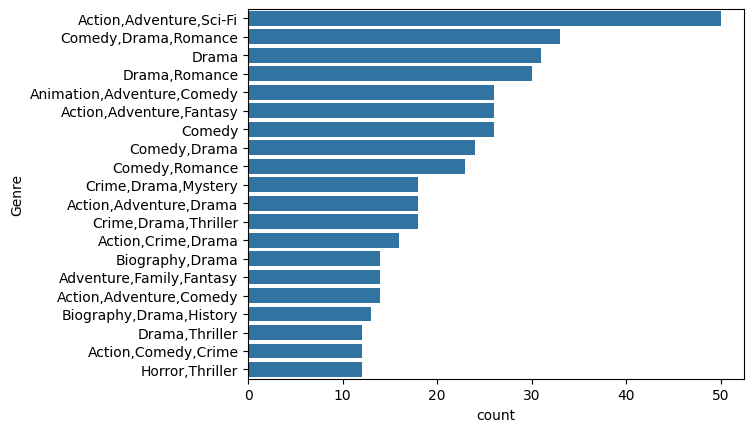

In [11]:
#most famous genres - (2006-2016)
sns.barplot(data=df['Genre'].value_counts().head(20), orient='h')

## 6. Analyzing the Movie Duration

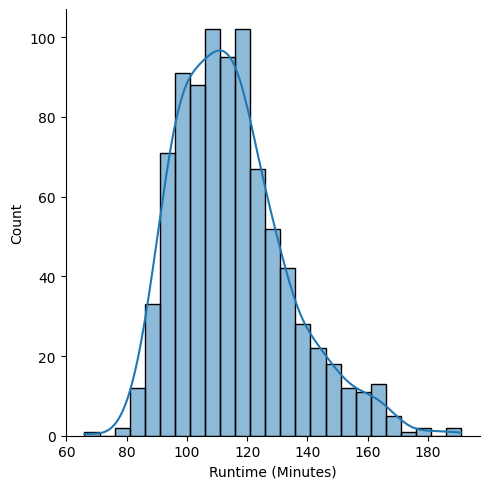

In [16]:
sns.displot(data=df['Runtime (Minutes)'], kde=True)

In [17]:
df['Runtime (Minutes)'].mean()

114.78325688073394

In [18]:
df['Runtime (Minutes)'].median()

112.0

<Axes: xlabel='Runtime (Minutes)', ylabel='Revenue (Millions)'>

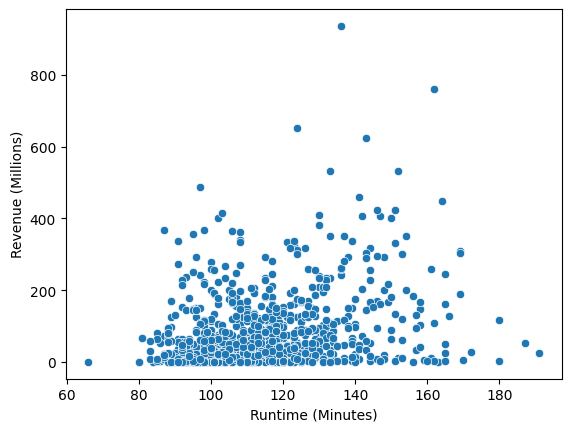

In [19]:
sns.scatterplot(data=df, x='Runtime (Minutes)', y='Revenue (Millions)')

<p>By our analysis above, we can conclude that most movies are between 100 - 120 minutes. I'd say that the "ideal" movie duration would be between 90 - 140 minutes. </p>

## 7. Most Sucessful Directors

<Axes: xlabel='count', ylabel='Director'>

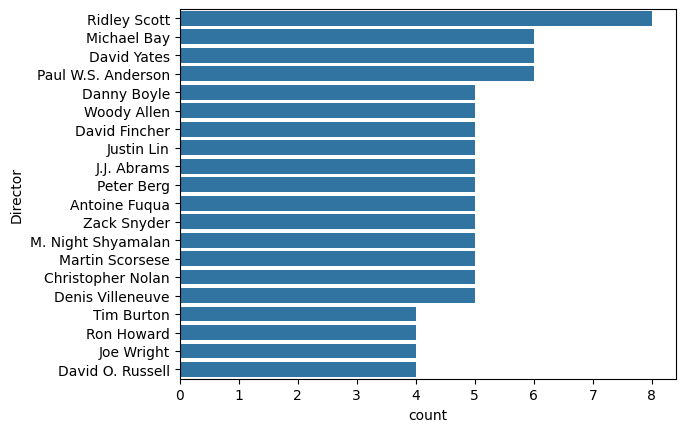

In [20]:
sns.barplot(data=df['Director'].value_counts().head(20), orient='h')

<p>From the dataset, the top 20 of the "most sucessful directors" are the ones above, as it tells us the directors with most participations in the 1000 most sucessful movies of the decade.</p>

<Axes: xlabel='Revenue (Millions)', ylabel='Director'>

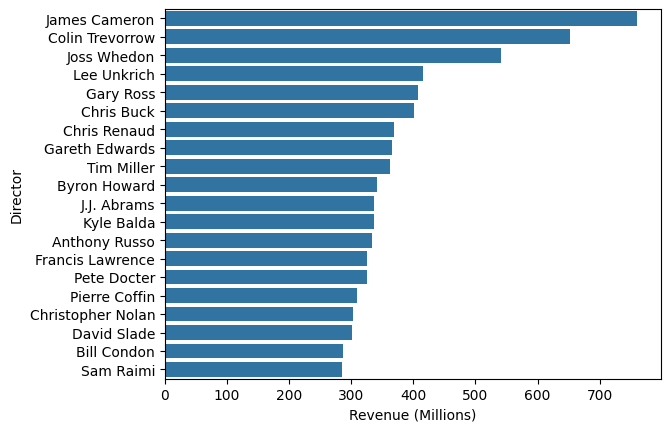

In [21]:
sns.barplot(data=df.groupby("Director")["Revenue (Millions)"].mean().sort_values(ascending=False).head(20), orient='h')

<p>Now, we have an interesting stat: The directors with the most revenue in average. Massive achievement by Christopher Nolan, as he gets an average revenue of 300 million dollars, approximately, directing 5 movies in the top 1000.</p>

## 8. Analyzing the Most Sucessful Actors

In [22]:
actors_nf = []
actors_series = df['Actors']
def get_actors():
    for i,v in actors_series.items():
        actors_nf.append(v.split(','))
        
get_actors()

#flattening our matrix of strings
def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

actors = flatten(actors_nf)
actors = dict(Counter(actors))
actors=pd.DataFrame(data=actors, index=['quant'])
actors = actors.T
actors.sort_values(ascending=False, by='quant').head(30)


,quant
Mark Wahlberg,11
Christian Bale,11
Jake Gyllenhaal,9
Woody Harrelson,9
Brad Pitt,9
Will Smith,9
Rose Byrne,9
Leonardo DiCaprio,9
Anne Hathaway,8
Joel Edgerton,8


# 9. Most voted movies

In [23]:
df.sort_values(by='Votes', ascending=False).head(20)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.000000
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.000000
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.000000
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.000000
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.000000
144,145,Django Unchained,"Drama,Western","With the help of a German bounty hunter , a fr...",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.4,1039115,162.80,81.000000
77,78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,120.52,69.000000
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.000000
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.000000
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.000000


<p>Props to Christopher Nolan with 5 movies into this Top 20.</p>

## 10. Analyzing Movies in 2016 - The worst year during the period

In [24]:
df_2016 = df[df['Year'] == 2016]
df_2016.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,205.000000,205.0,205.000000,205.000000,205.000000,205.000000,205.000000
mean,309.858537,2016.0,110.600000,6.625366,66977.229268,54.690976,59.195250
std,276.888373,0.0,17.543671,0.908209,87839.496082,88.842649,17.495167
min,3.000000,2016.0,66.000000,3.900000,178.000000,0.000000,11.000000
25%,73.000000,2016.0,98.000000,6.000000,11555.000000,3.440000,48.000000
50%,218.000000,2016.0,109.000000,6.700000,39784.000000,21.200000,59.575179
75%,526.000000,2016.0,120.000000,7.300000,79855.000000,63.030000,72.000000
max,1000.000000,2016.0,163.000000,8.800000,627797.000000,532.170000,99.000000


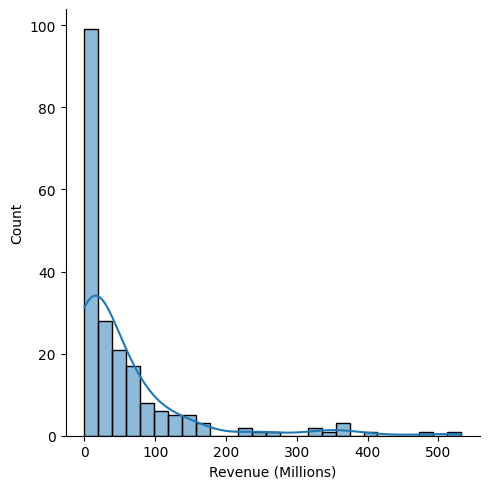

In [25]:
sns.displot(df_2016['Revenue (Millions)'],kde=True)

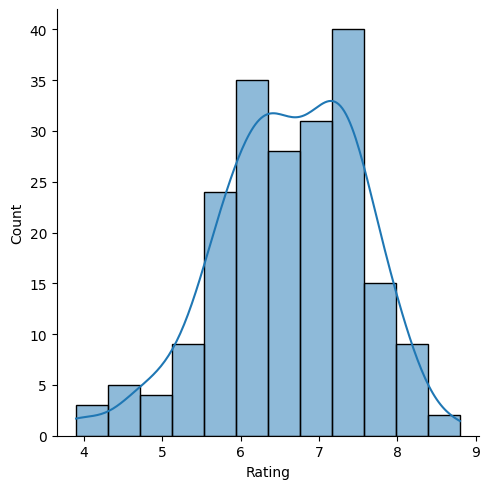

In [30]:
sns.displot(df_2016['Rating'],kde=True)

<p>By getting the descritive analysis of the 2016 movies, we can now definitely say that, in fact, 2016 was the <b>WORST YEAR</b> during the 10 years gap</p>

<ul>
    <li>Worse Mean Revenue;</li>
    <li>Worse STD Revenue;</li>
    <li>Worse Mean Rating.</li>
</ul>

<p>Also, we can see on the revenue graph that most movies got between 0 - 180 million in revenue, way different compared to the overall graph.</p>

# Conclusion

<p>We've analysed the dataset containing the 1000 most famous movies between the 2006-2016 gap. By that, we can conclude a few things:

<ol>
    <li>2016 was the worst year in terms of Revenue. Mean Rating is also below average.</li>
    <li>The most famous movie genres are <b>Action</b>, <b>Adventure</b>, <b>Thriller</b>, <b>Sci-fi</b> and <b>Drama</b>.</li>
    <li>We noticed that the high rating doesnt really imply on high revenue, but all movies with a revenue over 400 million dollars have a ratinfg of at least 7/10.</li>
    <li>Ridley Scott was the Director with the most appearences on the top 1000. Also, James Cameron, Colin Trevorrow and Joss Whedon were the ones with the highest mean revenue. </li>
    <li>Mark Wahlberg and Christian Bale were the actors with most appearences, with 11 participations each.</li>
    <li>On the top 20 most voted movies list, Christopher Nolan had 5 appearences as a director.</li>
</ol>


</p>